# Анализ бизнес-показателей Procrastinate Pro+

Исполнитель: Дмитриева Ксения<br> 
Текущая дата: 1 ноября 2019 года

## Техническое задание

Выявить причины убытков компании Procrastinate Pro+ при достаточных вложениях в рекламу. <br> 
По оценке бизнес-плана - пользователи должны окупаться не позднее чем через две недели после привлечения. <br> <br> 

Поставленные вопросы:<br> 
o	Окупается ли реклама, направленная на привлечение пользователей в целом?<br> 
o	Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?<br> 
o	Чем могут быть вызваны проблемы окупаемости?<br> 
<br> 
Данные предоставляемые Procrastinate Pro+:<br> 
•	логи сервера с данными о посещениях привлечённых пользователей с 01.05.19 по 27.20.19,<br> 
•	выгрузка их покупок за этот период,<br> 
•	рекламные расходы.<br> 
<br> 
### Описание данных:
Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, <br> 
orders_info_short.csv — информацию о заказах, <br> 
costs_info_short.csv — информацию о расходах на рекламу.<br> 
<br> 
Структура visits_info_short.csv:<br> 
•	User Id — уникальный идентификатор пользователя,<br> 
•	Region — страна пользователя,<br> 
•	Device — тип устройства пользователя,<br> 
•	Channel — идентификатор источника перехода,<br> 
•	Session Start — дата и время начала сессии,<br> 
•	Session End — дата и время окончания сессии.<br> 
<br> 
Структура orders_info_short.csv:<br> 
•	User Id — уникальный идентификатор пользователя,<br> 
•	Event Dt — дата и время покупки,<br> 
•	Revenue — сумма заказа.<br> 
<br> 
Структура costs_info_short.csv:<br> 
•	dt — дата проведения рекламной кампании,<br> 
•	Channel — идентификатор рекламного источника,<br> 
•	costs — расходы на эту кампанию.<br> 
<br> 
### Изучить:
•	откуда приходят пользователи и какими устройствами они пользуются,<br> 
•	сколько стоит привлечение пользователей из различных рекламных каналов;<br> 
•	сколько денег приносит каждый клиент,<br> 
•	когда расходы на привлечение клиента окупаются,<br> 
•	какие факторы мешают привлечению клиентов.<br> 

### Ход выполнения работы:
#### 0. Изучить предоставленные данные
visits_info_short.csv <br> 
orders_info_short.csv<br> 
costs_info_short.csv<br> 

#### 1. Предобработка данных:
- Оценить наличие пропусков;<br> 
- Оценить наличие дубликатов;<br> 
- Оценить корректность типов данных.<br> 

#### 2. Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии
- Создание профилей пользователей<br> 
- Подсчёт retention rate<br> 
- Подсчёт конверсии<br> 
- Подсчёт LTV <br> 
- Построение графиков <br> 

#### 3. Исследовательский анализ данных
- Составить профили пользователей. <br> 
- Определить минимальную и максимальную даты привлечения пользователей.<br> 
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. <br> 
--- Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.<br> 
- Узнайть, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.<br> 
--- Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.<br> 
- Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. <br> 
--- Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.<br> 

#### 4. Маркетинг
- Посчитать общую сумму расходов на маркетинг.<br> 
- Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.<br> 
- Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. <br> 
- Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.<br> 

#### 5. Оценка стоимости рекламы
Используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы. <br> 
•	Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.<br> 
•	Проверить конверсию пользователей и динамику её изменения. То же самое с удержанием пользователей. <br> 
•	Проанализировать окупаемость рекламы с разбивкой по устройствам. <br> 
•	Проанализировать окупаемость рекламы с разбивкой по странам. <br> 
•	Проанализировать окупаемость рекламы с разбивкой по рекламным каналам.<br> 

#### 6. Выводы


## Изучить файлы с данными

In [1]:
#импортирую необходимые библиотеки для работы
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
#читаю предоставленные файлы

try: #загружаю локальную версию
    visits_info_short = pd.read_csv('C://Users//Admin//Desktop//practicum//08_анализ бизнес показателей//Исходные файлы//visits_info_short.csv') #лог сервера с информацией о посещениях сайта
    orders_info_short = pd.read_csv('C://Users//Admin//Desktop//practicum//08_анализ бизнес показателей//Исходные файлы//orders_info_short.csv')#информация о заказах
    costs_info_short = pd.read_csv('C://Users//Admin//Desktop//practicum//08_анализ бизнес показателей//Исходные файлы//costs_info_short.csv')#информация о расходах на рекламу

except: #загружаю серверную версию
    visits_info_short = pd.read_csv('/datasets/visits_info_short.csv') 
    orders_info_short = pd.read_csv('/datasets/orders_info_short.csv') 
    costs_info_short = pd.read_csv('/datasets/costs_info_short.csv') 

#### Логи сервера

In [3]:
#вывожу на экран общую информацию о предоставленных данных 
visits_info_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
#вывожу на экран саму таблицу
visits_info_short.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
#проверяю наличие явных дубликатов
visits_info_short.duplicated().sum()

0

Количество заполненных данных во всех столбцых совпадает с общим количеством строк, нет пропущенных значений. <br>
Имеются некорректные типы данных для даты - исправить.<br> 
Необходимо привести к нижнему регистру наименование столбцов. <br>
Явные дубликаты отсутствуют.<br>

#### Информация о заказах

In [6]:
#вывожу на экран общую информацию о предоставленных данных 
orders_info_short.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
#вывожу на экран саму таблицу
orders_info_short.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
#проверяю наличие явных дубликатов
orders_info_short.duplicated().sum()

0

Вывод аналогичный. 

#### Информация о расходах на рекламу

In [9]:
#вывожу на экран общую информацию о расходах на рекламу
costs_info_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [10]:
#вывожу на экран саму таблицу
costs_info_short.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [11]:
#проверяю наличие явных дубликатов
costs_info_short.duplicated().sum()

0

Вывод аналогичный.

### Вывод об изученных данных. 
В предоставленных таблицах наименования столбцов необходимо привести к нижнему регистру, 
исправить тип данных с object на datetime64 в столбцах с датами. 

## 1. Предобработка данных

In [12]:
#привожу к нижнему регистру
visits_info_short.columns = visits_info_short.columns.str.lower()
visits_info_short.columns = visits_info_short.columns.str.replace(' ', '_')

orders_info_short.columns = orders_info_short.columns.str.lower()
orders_info_short.columns = orders_info_short.columns.str.replace(' ', '_')

costs_info_short.columns = costs_info_short.columns.str.lower()
costs_info_short.columns = costs_info_short.columns.str.replace(' ', '_')

#исправляю тип данных 
visits_info_short['session_start'] = pd.to_datetime(visits_info_short['session_start'])
visits_info_short['session_end'] = pd.to_datetime(visits_info_short['session_end'])

orders_info_short['event_dt'] = pd.to_datetime(orders_info_short['event_dt'])

costs_info_short['dt'] = pd.to_datetime(costs_info_short['dt'])

In [13]:
#проверяю исправления 
print('ЛОГИ')
print(visits_info_short.info(),'\n','*****************************************************','\n','\n')

print('ЗАКАЗЫ')
print(orders_info_short.info(),'\n','*****************************************************','\n','\n')

print('ЗАТРАТЫ НА РЕКЛАМУ')
print(costs_info_short.info(),'\n','*****************************************************')

ЛОГИ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None 
 ***************************************************** 
 

ЗАКАЗЫ
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  floa

Данные исправлены: изменён регистр в столбцах, скорректированы типы данных для дат. Перехожу к шагу 2. 

## 2. Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии

Функции для вычисления значений метрик:<br>
get_profiles() — для создания профилей пользователей,<br>
get_retention() — для подсчёта Retention Rate,<br>
get_conversion() — для подсчёта конверсии,<br>
get_ltv() — для подсчёта LTV.<br>
<br>
Функции для построения графиков:<br>
filter_data() — для сглаживания данных,<br>
plot_retention() — для построения графика Retention Rate,<br>
plot_conversion() — для построения графика конверсии,<br>
plot_ltv_roi — для визуализации LTV и ROI.<br>

### get_profiles() - функция для создания пользовательских профилей

In [14]:
#функции для создания пользовательских профилей передаю три аргумента: логи, заказы, траты на рекламу

def get_profiles(sessions, orders, costs):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start']) # сортируем сессии по ID пользователя и дате посещения
        .groupby('user_id') # группируем по ID и находим первые значения session_start и channel
        .agg({ # объединяю информацию в единое целое, где для каждого столбца будет указано первое значение из переменной sessions для каждого отдельного user_id
            'session_start': 'first', 
            'channel': 'first',
            'device': 'first',
            'region': 'first',
        }).rename(columns={'session_start': 'first_ts'}) # столбец с временем первого посещения назовём first_ts от англ. first timestamp — первая временная отметка
        .reset_index()) # возвращаем user_id из индекса

   
    # для будущего когортного анализа определяю дату первого посещения
    profiles['dt'] = profiles['first_ts'].astype('datetime64[D]')
    # и первый день месяца
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # проверим, есть ли ID пользователей из profiles в orders, 
    # таким образом в таблице profiles появится информация (True / False), что пользователь совершил заказ
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # в новой переменной считаем количество уникальных пользователей с одинаковыми источником привлечения
    # и датой привлечения для дальнейшего расчёта трат на рекламу
    new_users = (
        profiles.groupby(['dt', 'channel']) #группирую по дате и каналу привлечения
        .agg({'user_id': 'nunique'}) #объединяю по новоым пользователям
        .rename(columns={'user_id': 'unique_users'}) # переименовываю столбец 
        .reset_index()) #возвращаю индексы

    # добавляю к таблице costs данные из новой переменной с числом привлечённых пользователей 
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['CAC'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'CAC']],
        on=['dt', 'channel'],
        how='left')

    # иселючаю стоимость привлечения органических пользователей из итоговой таблицы профилей
    profiles['CAC'] = profiles['CAC'].fillna(0)

    return profiles #возвращаю результат функции 

### get_retention() - функция для расчёта удержания

In [15]:
#аргументы функции:
#profiles — профили пользователей,
#sessions — данные журнала сессий,
#observation_date — момент анализа,
#horizon_days — горизонт анализа в днях,
#dimensions - размер когорты
#ignore_horizon — опция «игнорировать горизонт анализа», по умолчанию False.

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### get_conversion() - функция для расчёта конверсии

In [16]:
#аргументы функции:
#profiles — профили пользователей,
#purchases — данные о покупке,
#observation_date — момент анализа,
#horizon_days — горизонт анализа в днях,
#dimensions - размер когорты
#ignore_horizon — опция «игнорировать горизонт анализа», по умолчанию False.

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### get_ltv() - функция для расчёта LTV и ROI

In [17]:
#аргументы функции:
#profiles — профили пользователей,
#purchases — данные о покупке,
#observation_date — момент анализа,
#horizon_days — горизонт анализа в днях,
#dimensions - размер когорты
#ignore_horizon — опция «игнорировать горизонт анализа», по умолчанию False.


def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'CAC'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'CAC': 'mean'})
            .rename(columns={'CAC': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### filter_data - функция для сглаживания фрейма

In [18]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### plot_retention - функция для визуализации удержания

In [19]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### plot_conversion - функция для визуализации конверсии

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### plot_ltv_roi - функция для визуализации LTV и ROI

In [21]:
# 

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Вывод
Функции get_profiles, get_retention, get_get_conversion, get_ltv и функции построения графиков к ним для расчёта стандартных метрик в исследовательском анализе подготовлены. 

## 3. Исследовательский анализ данных

### 3.1.Составление профилей пользователей

In [22]:
#применяю подготовленную функцию get_profiles() для анализа профилей пользователей из предоставленной заказчиком таблицы visits_info_short.csv
#аргументами функции выступают все три таблицы предоставленные заказчиком 

profiles = get_profiles(visits_info_short, orders_info_short, costs_info_short)

#вывожу результат функции на экран
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,CAC
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [23]:
#оцениваю таблицу на пропущенные значения и некоректные типы данных
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   user_id   150008 non-null  int64         
 1   first_ts  150008 non-null  datetime64[ns]
 2   channel   150008 non-null  object        
 3   device    150008 non-null  object        
 4   region    150008 non-null  object        
 5   dt        150008 non-null  datetime64[ns]
 6   month     150008 non-null  datetime64[ns]
 7   payer     150008 non-null  bool          
 8   CAC       150008 non-null  float64       
dtypes: bool(1), datetime64[ns](3), float64(1), int64(1), object(3)
memory usage: 10.4+ MB


##### Вывод по шагу 3.1. 
Данные подготовлены корректно 

### 3.2. Определить минимальную и максимальную даты привлечения пользователей.
Необходимо выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.<br>
Для оценки результатов построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [24]:
# Определяю минимальную и максимальную дату привлечения пользователей для оценки временного диапазона

print('Начало привлечения пользователей (минимальная дата):', profiles['dt'].min())
print('Последний день привлечения пользователей (максимальная привлечения):', profiles['dt'].max())

Начало привлечения пользователей (минимальная дата): 2019-05-01 00:00:00
Последний день привлечения пользователей (максимальная привлечения): 2019-10-27 00:00:00


In [25]:
# Воспользуюсь дополнительной вспомогательной функцией для анализа профилей пользователей users/payers/ratio - upr
# С помощью этой функции проанализирую структуру пользователей в разрезе различных параметров,с разделением на платящих и не платящих пользователей

def upr(col):
    users = profiles.groupby(col).agg({'user_id': 'nunique'})
    payers = profiles.loc[profiles['payer']==True].groupby(col).agg({'user_id': 'nunique'})
    ratio = 100*payers / users
    not_payers = users - payers    
    table1 = pd.concat([ratio],axis=1)
    table1.columns = ['% платящих пользователей']
    
    table2 = pd.concat([payers,not_payers],axis=1)
    table2.columns = ['Платящие','Не платящие']
    table2 = table2.sort_values(by='Платящие',ascending=True)
    
    table3 = pd.concat([users],axis=1).plot(kind='pie', subplots=True, autopct='%1.1f%%', legend=False)
    plt.title('Распределение долей')
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 4))
    bars = table2[['Платящие', 'Не платящие']].plot(kind='barh', ax=ax, alpha=0.4)

    ax.legend(bbox_to_anchor=(1.0, 1.0))
    plt.title('Количество пользователей')
    ax.set_ylabel(' ')
    for container in ax.containers :
        ax.bar_label (container) 
                      
    plt.show()    
    return table1.round(2).sort_values(by='% платящих пользователей', ascending=False)

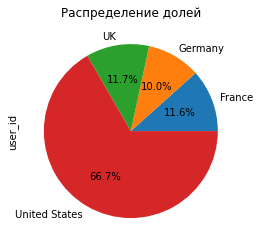

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

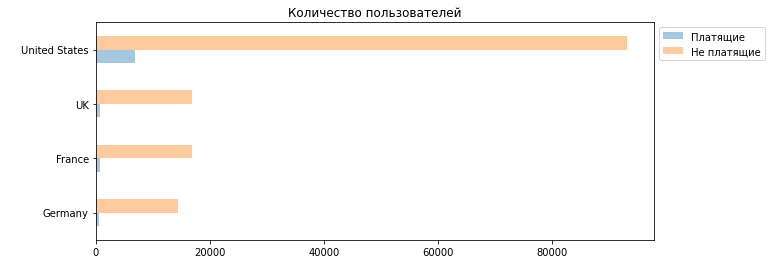

In [26]:
upr('region')

##### Вывод по шагу 3.2
На Соединённые штаты приходится большая часть рынка - 66,7%. <br>
Самый большой процент - 6,9%  - платящих пользователей приходится также на Соединённые Штаты, что обусловлено непосредственно занимаемой долей рынка. 

### 3.3. Узнайть, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

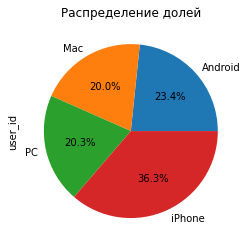

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

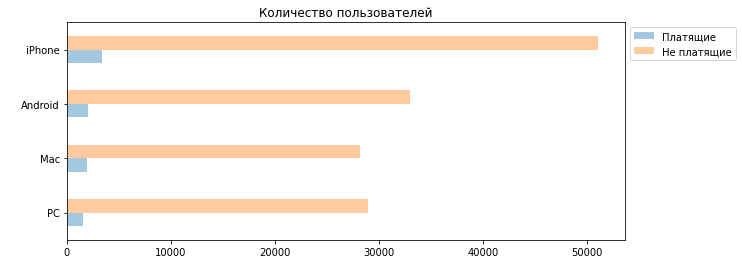

In [27]:
upr('device')

##### Вывод по шагу 3.3.
Доли используемых устройств распределены между собой достаточно равномерно, однако на пользователей IPhone приходится 36.3%. <br>
Тем не менее, процент платящих пользователей с Mac несколько выше, чем с IPhone: 6.36 против 6.21

### 3.4.Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.
--- Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

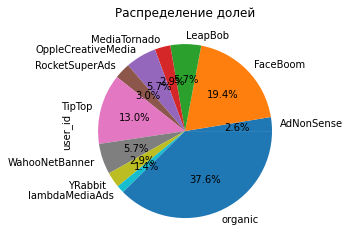

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

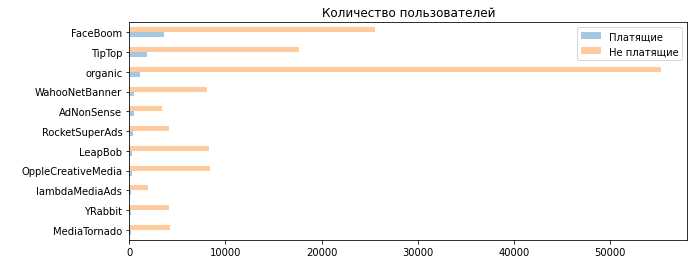

In [28]:
upr('channel')

##### Вывод по шагу 3.4
На сколько видно из графиков, 37.6% занимают пользователи пришедшие органическим (без привлечения рекламой) образом. Но процент платящих пользователей самый низкий.<br>
Остальные 62,4% пришли с помощью релкламных компаний, где самый большой траффик обеспечили FaceBoom и TipTop.<br>
Процент платящих пользователей также с рекламной компании от Faceboom самый большой - 12.20%. <br>
Второе и третье место у AdNonSense (11.34%) и lambdaMediaAds (10.47%) соответственно. 

### Вывод по разделу 3
Из более чем 15000 пользователей 66.7% составляют жители Соединённых Штатов Америки. <br>
Остальные регионы (Англия, Германия, Франция) делят между собой оставшиеся 32.3% поровну. <br>
36% пользователей используют IPhone. <br>
Самыми платящими оказались пользователи Mac (6.36%) и IPhone (6.21%).<br>

37.6% пользователей приходят органическим путём и при этом совершают всего 2% покупки.<br>
Самый большой показатель по траффику у рекламных компаний FaceBoom (19%) и TipTop(13%). <br>
Самый большой процент платящих пользователй привлечены рекламными компаниями FaceBoom (12.2%), AdNonSense (11.34%) и lambdaMediaAds (10.47%).<br>

## 4. Маркетинг

4.1. Посчитать общую сумму расходов на маркетинг. <br>
4.2. Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.<br>
4.3. Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.<br>
4.4. Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.<br>

### 4.1 Расходы на маркетинг

In [29]:
print('Общая сумма расходов на маркетинг составила:',costs_info_short['costs'].sum().round(2))

Общая сумма расходов на маркетинг составила: 105497.3


### 4.2 Распределение бюджета на рекламные компании

                    Затраты на рекламу
channel                               
TipTop                        54751.30
FaceBoom                      32445.60
WahooNetBanner                 5151.00
AdNonSense                     3911.25
OppleCreativeMedia             2151.25
RocketSuperAds                 1833.00
LeapBob                        1797.60
lambdaMediaAds                 1557.60
MediaTornado                    954.48
YRabbit                         944.22


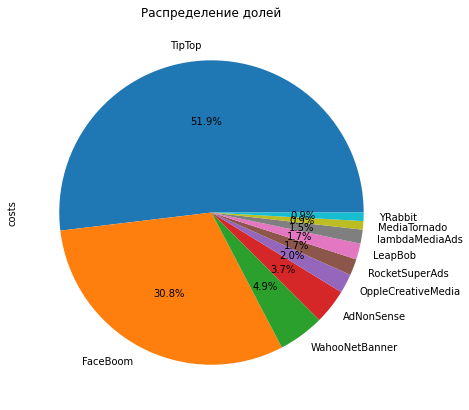

In [30]:
costs_ad = costs_info_short.groupby('channel').agg('sum').sort_values(by='costs', ascending=False)
costs_ad.columns = ['Затраты на рекламу']
print(costs_ad)


#Распределение суммы между рекламными компаниями
costs_info_short.groupby('channel').agg('sum').sort_values(by='costs', ascending=False).plot(kind='pie', 
                                                                                             subplots=True, 
                                                                                             autopct='%1.1f%%', 
                                                                                             legend=False, 
                                                                                             figsize=(7, 7))
plt.title('Распределение долей')
plt.show()

##### Вывод по 4.2 
51.9% бюджета занимает рекламная компания TipTop <br>
30.8% бюджета занимает рекламная компания FaceBoom <br>
4.9% - WahooNetBanner <br>
Остальное, менее 13%, распределено между другими каналами привлечения.

### 4.3. Динамика изменения расходов 

In [31]:
# Добавляю столбцы месяца и неделю в основную таблицу расходов 
costs_info_short['month'] = costs_info_short['dt'].dt.month 
costs_info_short['week'] = costs_info_short['dt'].dt.week 

/tmp/ipykernel_196/4005663192.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  costs_info_short['week'] = costs_info_short['dt'].dt.week


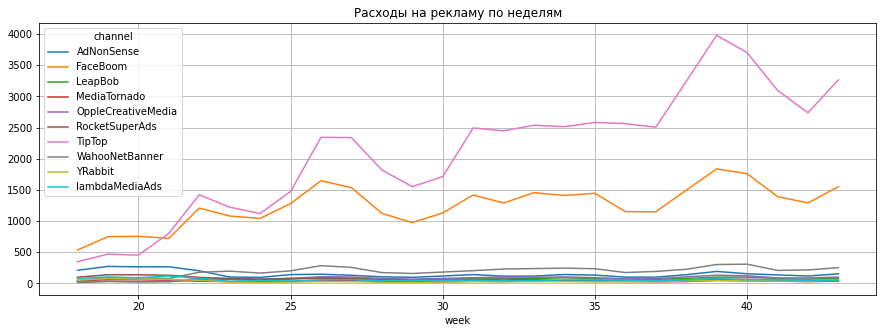

In [32]:
costs_info_short.pivot_table(
    index='week',
    columns='channel',
    values='costs',
    aggfunc='sum'
).plot(figsize=(15, 5), grid=True, title='Расходы на рекламу по неделям')

plt.show()

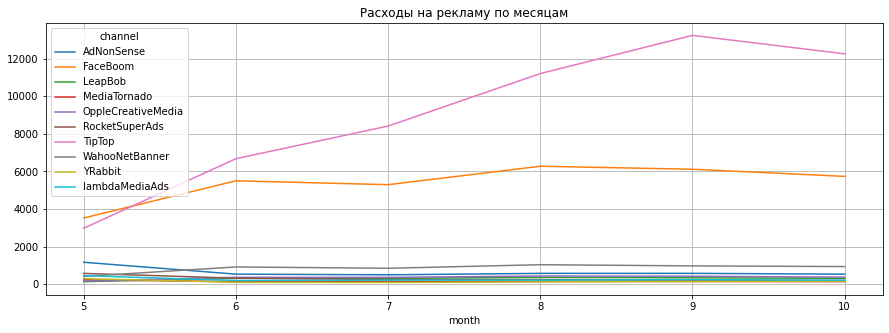

In [33]:
costs_info_short.pivot_table(
    index='month',
    columns='channel',
    values='costs',
    aggfunc='sum'
    ).plot(figsize=(15, 5), grid=True, title='Расходы на рекламу по месяцам')

plt.show()

Графики показывают, что основной упор с мая по сентябрь делался на две рекламные компании FaceBoom и TipTop. Во все остальные вложений было примерно на одном уровне, до 300 тысяч. 
Стоит подробнее рассмотреть графики для других рекламных компаний. 

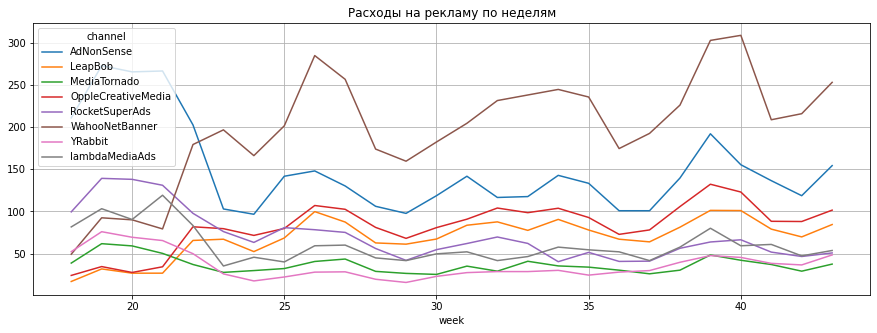

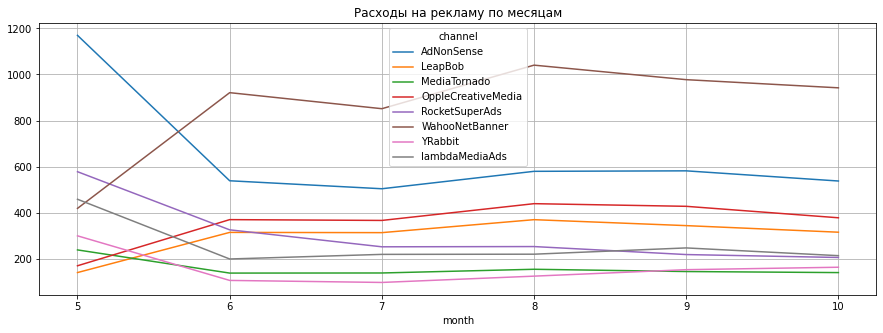

In [34]:
#приближу графики по остальным РК

costs_info_short2 = costs_info_short.query('channel != ["TipTop", "FaceBoom"]')

costs_info_short2.pivot_table(
    index='week',
    columns='channel',
    values='costs',
    aggfunc='sum'
).plot(figsize=(15, 5), grid=True, title='Расходы на рекламу по неделям')

plt.show()

costs_info_short2.pivot_table(
    index='month',
    columns='channel',
    values='costs',
    aggfunc='sum'
    ).plot(figsize=(15, 5), grid=True, title='Расходы на рекламу по месяцам')

plt.show()

В некоторые рекламные компании снизили инвестици примерно в два раза:
AdNonSense, RocketSuperAds, LambdaMediaAds, YRabbit, MediaTornado. 

В три увеличили бюджет в два раза:
WahooNetBanner, OppleCreativeMedia и LeapBob.

### 4.4. Стоимость привлечения клиентов

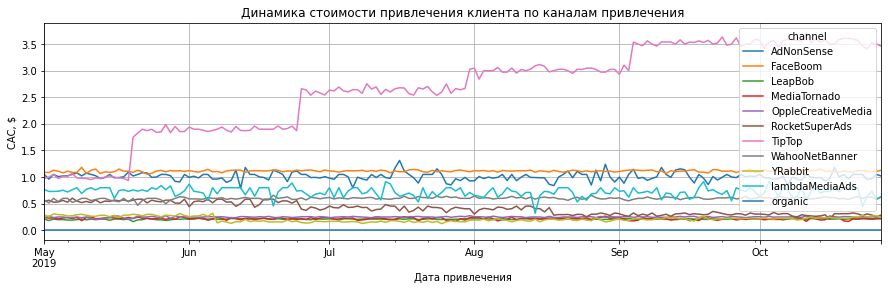

In [35]:
profiles.pivot_table(
    index='dt', 
    columns='channel', 
    values='CAC', 
    aggfunc='mean'
).plot(grid=True, figsize=(15, 4))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика стоимости привлечения клиента по каналам привлечения')
plt.show()

Стоимость привлечения клиентов через канал ToipTop растёт с каждым месяцем, а FaceBoom и остальные каналы находятся на одном уровне.

In [36]:
#среднее значение привлечения пользователей для каждой рекламной компании

piva = profiles.pivot_table( 
    index='channel', 
    values='CAC',
    aggfunc = ['min','mean', 'max']
)
piva.sort_values(by = [piva.columns[1]], ascending=False)

,min,mean,max
,CAC,CAC,CAC
channel,,,
TipTop,0.935484,2.799003,3.715385
FaceBoom,1.052688,1.113286,1.183544
AdNonSense,0.787500,1.008054,1.312500
lambdaMediaAds,0.320000,0.724802,0.914286
WahooNetBanner,0.469565,0.602245,0.660000
RocketSuperAds,0.208929,0.412095,0.603871
OppleCreativeMedia,0.205882,0.250000,0.277778
YRabbit,0.124615,0.218975,0.323077


Из таблицы видно, что стоимость привлечения значительно растёт для РК TipTop.

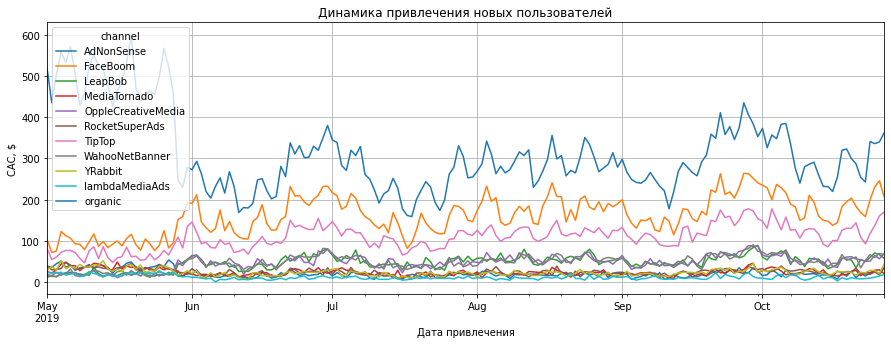

In [37]:
profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика привлечения новых пользователей')
plt.show()

Основные каналы привлечения являются FaceBoom и TipTop, а также клиенты прибывшие органическим путём. 
Сотоит отметить, что канал FaceBoom при меньших инвестициях привлекает больше пользователей, чем TipTop.

### Вывод по разделу 4
Анализ затрат на маркетинг показал, что с мая по октябрь основная масса инвестиций была вложена в два канала привлечения клиентов: FaceBoom и TipTop. <br>
Стоимость привлечения клиентов через канал TipTop с каждым месяцем растёт. <br>
При этом динамика привлечения новых пользователей у FaceBoom выше. <br>
Органический траффик в июне упал в два раза, как раз с июня начался существенный рост вложений в два канала TipTop и FaceBoom. <br>
Остальные каналы привлечения, из-за низких, относительно TipTop и FaceBoom, вложений существенного прироста ни по одной метрике не показывают. 

## 5. Оценка стоимоти рекламы

5.1. Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI. <br>
5.2. Проверить конверсию пользователей и динамику её изменения. <br>
5.3. Проверить удержание пользователей и динамику его изменения. <br>
5.4. Проанализировать окупаемость рекламы с разбивкой по устройствам. <br>
5.5. Проанализировать окупаемость рекламы с разбивкой по странам. <br>
5.6. Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. <br>

### 5.1. Окупаемость рекламы

In [38]:
#для оценки окупаемости необходимо исключить органический траффик, так как на него затрат нет
profiles = profiles.query('channel != "organic"')

In [39]:
#задаю значения основным аргументам функций для расчёта LTV и ROI
import datetime as dt
date = '20191101'

observation_date = dt.datetime.strptime(date, '%Y%m%d')
horizon_days = 14


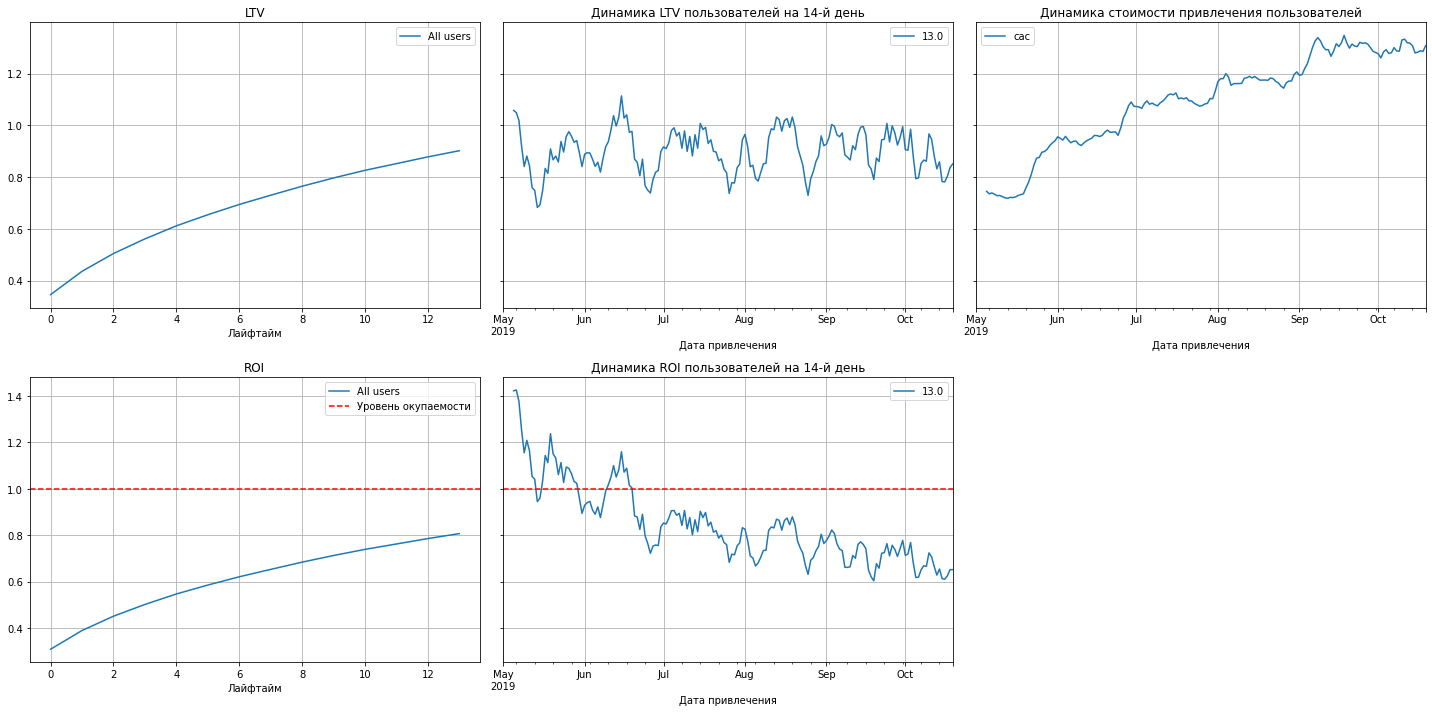

In [40]:
# расчитываю LTV, ROI и их динамики
(
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) = get_ltv(profiles,
                orders_info_short,
                observation_date,
                horizon_days,
                dimensions=[],
                ignore_horizon=False,)

# Визуализируем полученные показатели на графиках
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days, window=5)

На первой диаграмме видно, что в целом LTV имеет стабильный рост с начала активных инвестиций в TipTop и FaceBoom.<br>
Динамика LTV показывает, что прибыль компании с каждого пользователя подросла минимум на 10%, так же имеются пики активности, но в целом динамика стабильная, и не просаживается до значений в доинвестиционный период.<br>
Однако, график динамики стоимости привлечения пользователей растёт - это значит что каждый клиент обходится компании дороже с каждым месяцем. <br>
На этом фоне реклама только сейчас близка к порогу окупаемости.<br>
Динамика ROI показывает также снижение эффективности рекламной компании с мая по октябрь и тенденция пока продолжается. <br>

### 5.2. Конверсия пользователей и динамика её удержания

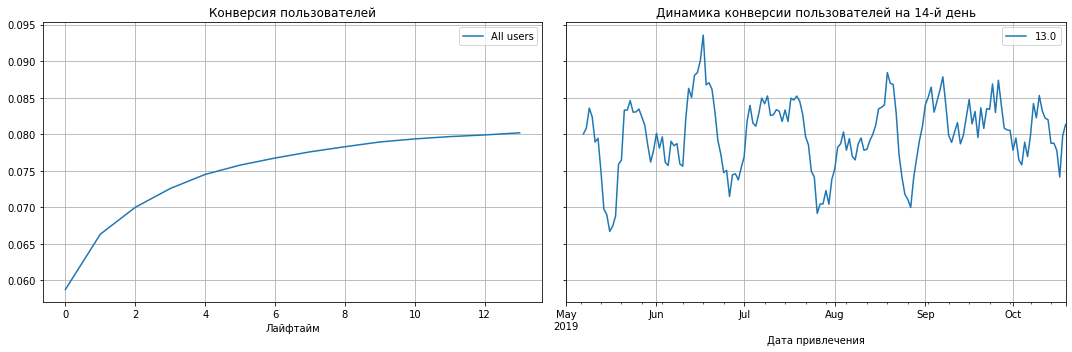

In [41]:
# Вызовем и визуализируем функции для расчета конверсии
result_raw, result_grouped, result_in_time = get_conversion(
    profiles,
    orders_info_short,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

Конверсия пользователей показывала стабильный рост с мая, но темп роста снижается. <br>
Динамика с мая выросла минимум на 1%, однако имеется большой разброс в конверсии, со средним значеним на уровне 1.5%. 


### 5.3. Удержание пользователей

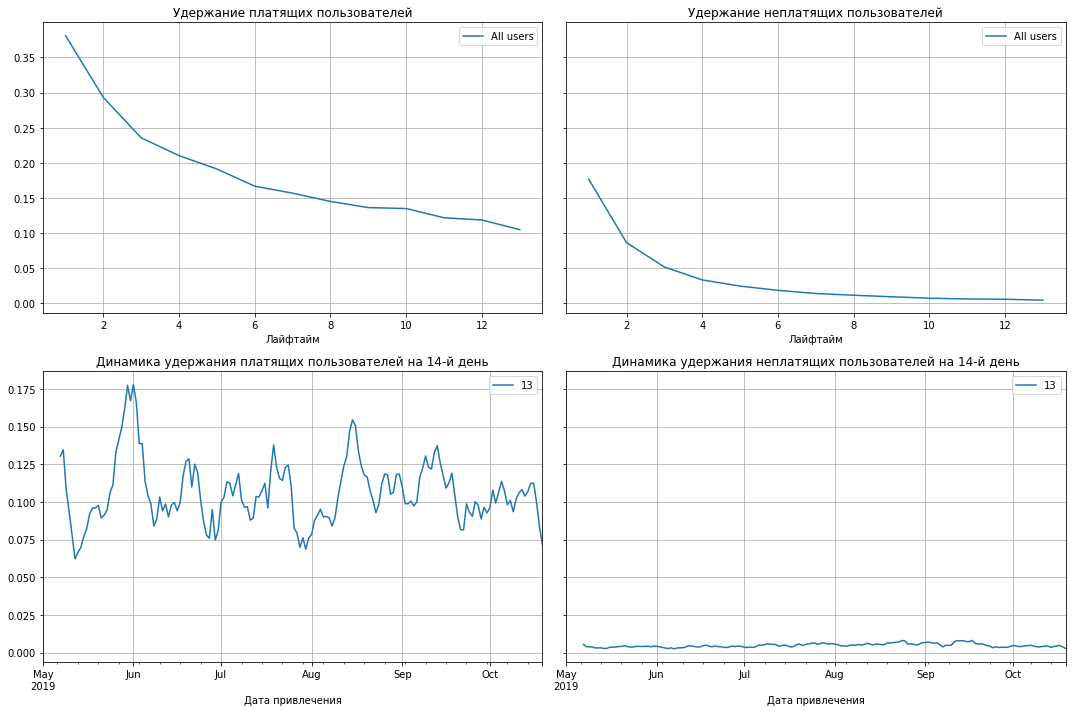

In [42]:
result_raw, result_grouped, result_in_time = get_retention(
    profiles,
    visits_info_short,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

plot_retention(result_grouped, result_in_time, horizon_days, window=7)

Удержание заплативших пользователей к 14 дню составляеет чуть больше 10%. Удержание неплатящих стремится к 0.
Динамика удержания так же имеют тенденцию к снижению. 

### 5.4. Окупаемость рекламы с разбивкой по устройствам

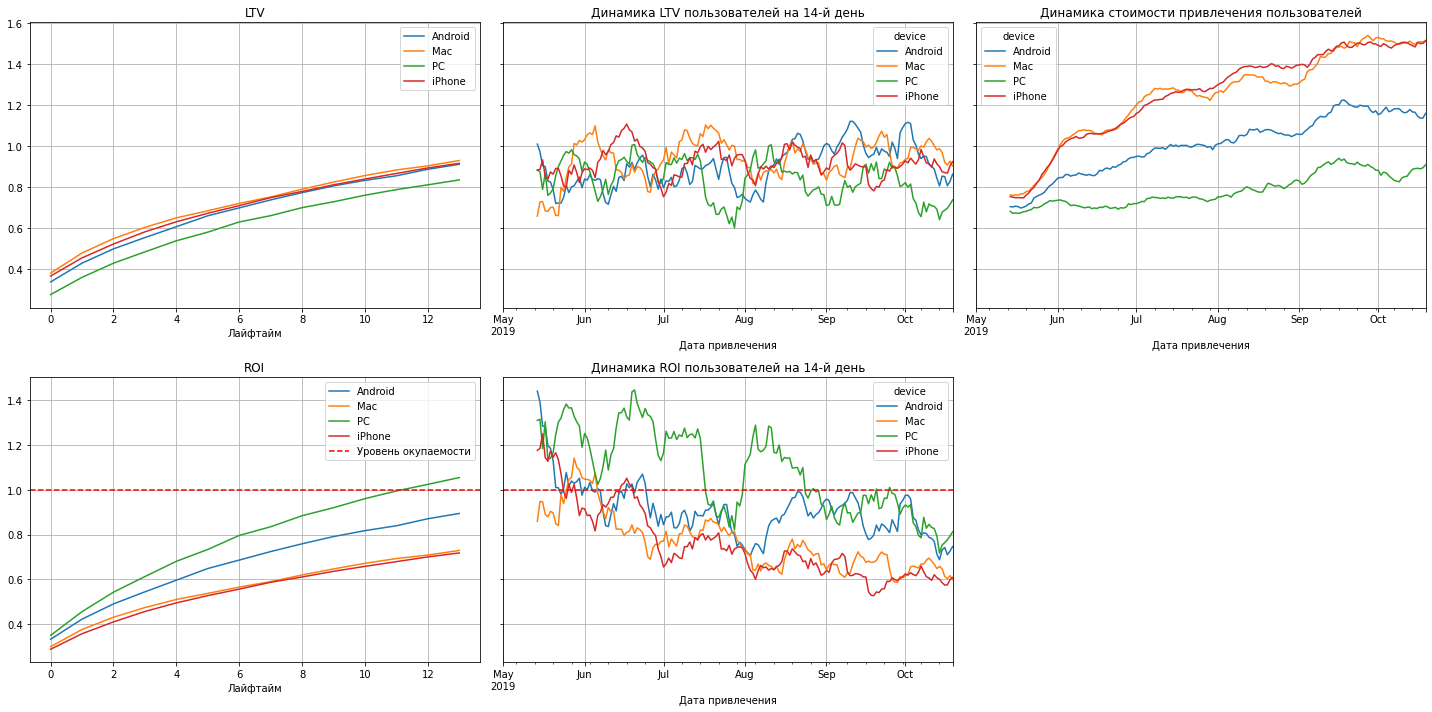

In [43]:
(
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) = get_ltv(profiles,
                orders_info_short,
                observation_date,
                horizon_days,
                ['device'],
                ignore_horizon=False,)

# Визуализируем полученные показатели на графиках
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days, window=14)

LTV на всех устройствах растёт, значит продукт одинаково качественен для любой платформы. Это же подтверждает динамика пользователей на 14 день - стабильна. <br>
Стоит отметить, что на Iphone и Mac стоимость привлечения самая высокая. Самая низкая у пользователей персональных компьютеров (PC). И только для пользователей РС рекламная компания окупилась и вышла в плюс. Близка к порогу окупаемости рекламные инвестиции для платформы на android. <br>
Динамика ROI пользователей для всех категорий имеет небольшое снижение, однако на IPhone и Mac снижается сильнее всего. 
Вероятно для продукции apple есть какие-то проблемы с приложением.

### 5.5. Окупаемость рекламы  разбивкой по странам

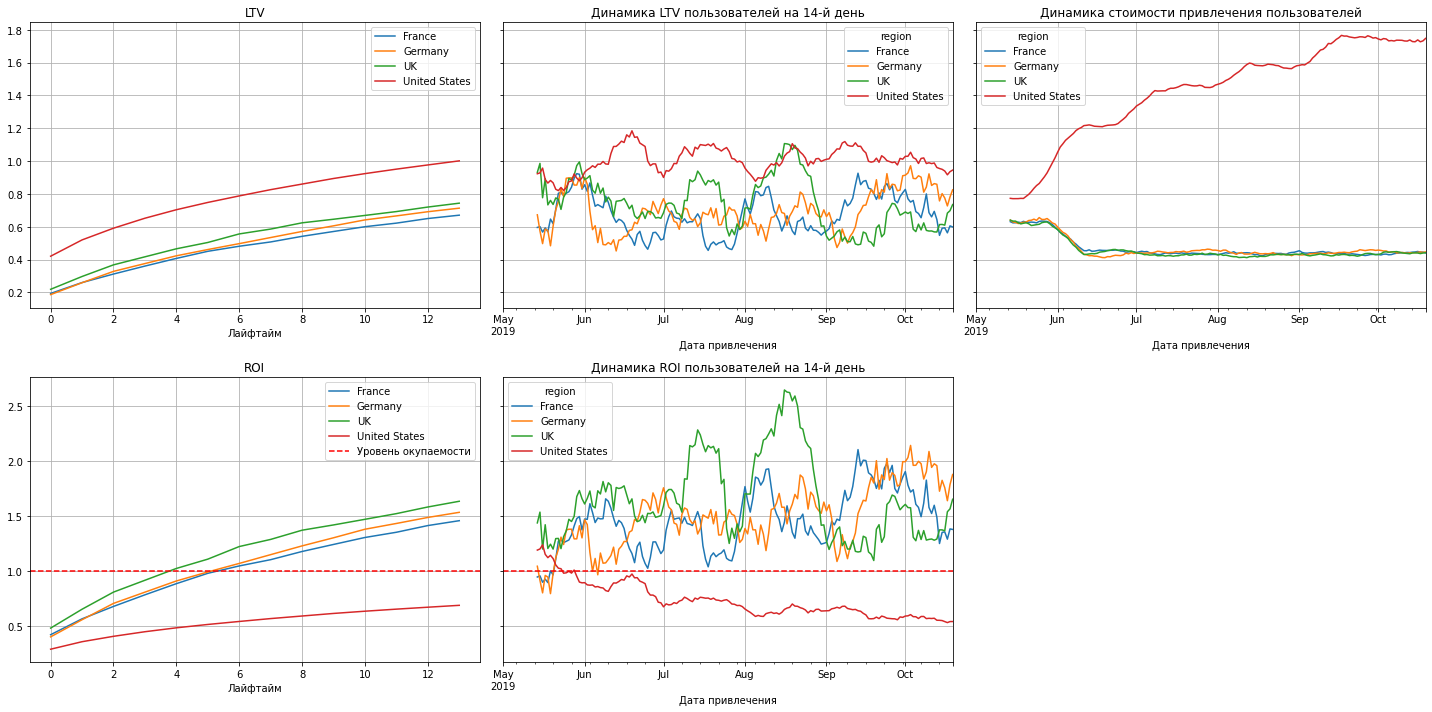

In [44]:
(
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) = get_ltv(profiles,
                orders_info_short,
                observation_date,
                horizon_days,
                ['region'],
                ignore_horizon=False,)

# Визуализируем полученные показатели на графиках
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days, window=14)

Прибль от клиентов растёт пропорционально по всем регионам, LTV очевидно больше у США, так как там сосредосточен основная масса пользователей.<br>
В Америке до начала запуска было проседание, однако РК привели к росту показателя с июня и динамика в целом выше, чем без РК. <br>
Все регионы в июне показывают всплеск активностии. он он плавно успокаивается. В сентябре октябре для других регионов опять активность. <br>
Стоимость привлечения в США растёт, у остальных регионов уже вышла на окупаемость. <br><br>

В связи с этим, по США есть некоторые проблемы: через месяц после привлечения затраты на привлечение больше, чем клиент приносит. И динамика для США продолжает падать. Стоит на это обратить особое внимание, так как именно США для нас являются основным рынком.<br>

### 5.6. Окупаемость рекламы с разбивкой по рекламным каналам

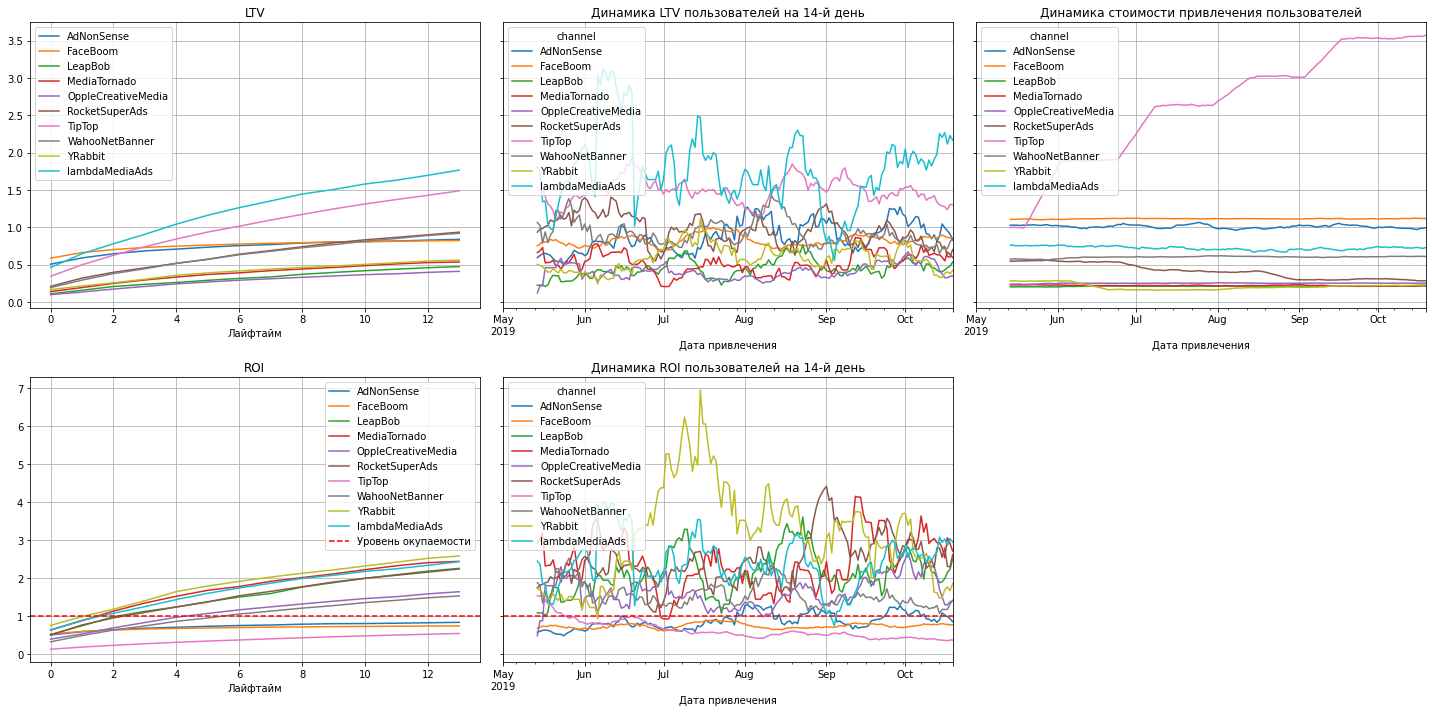

In [45]:
(
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) = get_ltv(profiles,
                orders_info_short,
                observation_date,
                horizon_days,
                ['channel'],
                ignore_horizon=False,)

# Визуализируем полученные показатели на графиках
plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days, window=14)

Прибль с клиентов растёт ото всех РК, однако растут и затраты на привлечение клиентов для РК TipTop, для остальных достаточно ровные затраты, тем не менее это не позволяет выйти на окоупаемость для таких рекламных компаний как: TipTop, FaceBoom и AdNonSence.<br>
В связи с этим можно сделать вывод, что данные рекламные компании не эффективны. <br>

Рекламные компании OppleCreativeMedia, YRabbit окупили себя ближе к середине лайфтайма. <br>
LeapBob, MediaTornado, RocketSuperAds, WahooNetBanner и LambdaMediaAds окупили себя в первой трети лайфтайма. Данные рекламные компании являются наиболее эффективными. <br>


## 6. Выводы по проведённому анализу показателей

В предоставленных заказчиком таблицах требовалось провести незначительную предобработку данных для оптимизации процесса исследовательского анализа, а именно корректировка наименования столбцов и исправление типа данных с object на datetime64 в столбцах с датами, что было мною проведено. <br>
Для ответа на поставленные вопросы в подготовительной части создала функции расчёта основных метрик, а именно функции профилей пользователей, удержания пользователей, конверсии и итоговой ценности пользователей. <br><br>
В ходе самого анализа требовалось дать ответ на следующие вопросы:<br>
-Окупается ли реклама, направленная на привлечение пользователей в целом?<br>
-Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?<br>
-Чем могут быть вызваны проблемы окупаемости?<br><br>
Начать следует с того, что доли устройств, на которых клиенты пользуются развлекательным приложением Procrastinate Pro+ распределились следующим образом:<br>
лидируют пользователи IPhone – на их долю приходится 36.3%;<br>
на долю Android устройств - 23,4%;<br>
персональные компьютеры (PC) - 20,3%;<br>
устройства Mac - 20%. <br><br>
Процент платящих пользователей с Mac несколько выше, чем с IPhone: 6.36 против 6.21.<br>
На Android – 5.85%;<br>
на PC всего 5.05% пользователей становятся платными клиентами. <br><br>
Траффик пользователей, которые пришли в рамках проведения маркетинговой активности составляет 62,4%. Самый большой процент привлечения клиентов обеспечили рекламные компании (РК) FaceBoom и TipTop.<br>
Процент платящих пользователей Faceboom самый большой - 12.20%.<br>
Второе и третье место у AdNonSense (11.34%) и lambdaMediaAds (10.47%) соответственно.<br>
Рекламная компания TipTop занимает 4-е место и привлекает 9,6% платных клиентов.<br>
Остальные 37,6% пользователи пришли органически, то есть без привлечения рекламой, однако всего 2% из них становятся платными клиентами.<br><br>
Общая сумма расходов на маркетинг составила: 105497.3 <br>

Из них:<br>
51.9% бюджета занимает рекламная компания TipTop;<br>
30.8% бюджета занимает рекламная компания FaceBoom;<br>
Остальное, распределено между другими каналами привлечения.<br><br>

Графики показывают, что основной упор с мая по сентябрь делался на две рекламные компании FaceBoom и TipTop. Во все остальные РК вложения на относительно низком уровне.<br>

В связи с этим FaceBoom и TipTop являются основными каналами привлечения пользователей. Стоит отметить, что канал FaceBoom при меньших инвестициях привлекает больше пользователей, чем TipTop.<br>
LTV имеет стабильный рост с начала активных инвестиций в TipTop и FaceBoom, а это вероятно значит, что заинтересованность клиентов в продукте есть и клиенты им пользуются.<br>
Это предположение подтверждается следующим графиком динамики LTV на 14 день - он стабильный, то есть, не менее 10% пользователей на 14 день используют развлекательное приложение. <br>
Однако, график динамики стоимости привлечения пользователей растёт - это значит что каждый клиент обходится компании дороже с каждым месяцем и есть некоторые проблемы.<br>

Можно говорить, что окупаемость рекламы низкая, на уровне 80%.<br>
Динамика ROI показывает также снижение эффективности рекламной компании с мая по октябрь и тенденция пока продолжается.<br>
Конверсия пользователей показывала стабильный рост с мая, но темп роста снижается.<br>
Тем не менее, динамика имеет некоторую цикличность, но показывает стабильный уровень покупаемости приложения.<br><br>
Удержание платящих и неплатящих пользователей ожидаемо снижается. Динамика аналогично цикличная, но стабильная для обоих категорий и это значит, что продукт пользователям интересен.<br>
LTV на всех устройствах растёт, значит продукт одинаково качественен для любой платформы. Это же подтверждает динамика пользователей на 14 день - стабильна.<br><br>
Стоит отметить, что на Iphone и Mac стоимость привлечения самая высокая. <br> Самая низкая у пользователей PC и только для пользователей РС рекламная компания окупилась и вышла в плюс. <br>Близки к порогу окупаемости рекламные инвестиции для платформы на Android.<br><br>
Динамика ROI пользователей для всех категорий имеет небольшое снижение, однако на IPhone и Mac снижается сильнее всего.<br><br> 

Прибль от клиентов растёт пропорционально по всем регионам, LTV очевидно больше у США, так как там сосредосточен основная масса пользователей.<br>
В Америке до начала запуска было проседание, однако РК привели к росту показателя с июня и динамика в целом выше, чем без РК.<br>
Стоимость привлечения в США растёт, у остальных регионов уже вышла на окупаемость.<br>


В связи с этим, по США есть некоторые проблемы: через месяц после привлечения затраты на привлечение больше, чем клиент приносит. И динамика для США продолжает падать. Стоит на это обратить особое внимание, так как именно США для нас являются основным рынком.<br><br>
При рассмотрении данных в разрезе каждой отдельной рекламной компании можно сделать вывод что, прибль с клиентов растёт ото всех РК, однако растут и затраты на привлечение клиентов для РК TipTop, для остальных затраты на одном уровне, тем не менее это не позволяет выйти на окоупаемость для таких рекламных компаний как: TipTop, FaceBoom и AdNonSence. Можно сделать зючение, что данные рекламные компании не эффективны.


### Рекомендации: 
Обратить внимание на LambdaMediaAds. Несмотря на низкие инвестиции, данная рекламная компания входит в тройку лидеров по платящим пользователям и по всем показателям имеет стабильный рост, является наиболее эффективной РК. <br>
Также стоит обратить внимание на РК OppleCreativeMedia, YRabbit, LeapBob, MediaTornado, RocketSuperAds и WahooNetBanner.

Пересмотреть объём инвестий в рекламные компании TipTop, FaceBoom и AdNonSence, как в неэффективные.<br>

Стоит обратить внимание на приложение для продукции apple - вероятно есть проблемы, которые не позволяют клиентам продолжать использование приложения, напимер баги, проблемы с интерфейсом и т.д.  <br>
Графики динамики показывают периодические всплески активности пользователей, вероятно в это время были введены какие-то адвенты или ещё что-то, что заставило пользователей возвращаться в приложение чаще, если увеличить такие мероприятия, клиенты будут дольше оставаться с нами. 